# 선형회귀 모델

In [44]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#데이터 불러오기 및 불필요한 변수제거
accident = pd.read_csv("전처리 최종.csv",encoding='cp949') 
accident=accident.drop(["기간","지역"],axis=1,inplace=False)

#bias 추가
 
#상수항 추가
accident = sm.add_constant(accident, has_constant = "add")
print(accident.head())
 
#설명변수(X) ,타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할
 
featureColums = list(accident.columns.difference(["발생건수"]))
 
x = accident[featureColums]
y = accident.발생건수
 
trainX ,testX , trainY , testY = train_test_split(x,y,train_size=0.7,test_size=0.3)
print(trainX.shape,testX.shape,trainY.shape,testY.shape)

   const    발생건수  사망자수    부상자수      맑음     흐림      비  안개     눈  기타/불명  ...  \
0    1.0  1436.0  19.0  2009.0  1104.0  142.0  148.0   0  23.0   19.0  ...   
1    1.0  1540.0   7.0  2152.0  1238.0  159.0  126.0   0  15.0    2.0  ...   
2    1.0  1245.0  15.0  1738.0   962.0   70.0  124.0   1  26.5   39.5  ...   
3    1.0  1097.0  15.0  1528.0   896.0   77.0   98.0   1  15.0   10.0  ...   
4    1.0  1540.0  17.0  2212.0  1267.0  129.0  125.0   0  18.0    1.0  ...   

       인구  14세 이하  15~20세  21~30세  31~40세  41~50세  51~60세  61-64세  65~70세  \
0  179362    51.0   111.0   431.0   430.0   418.0   374.0      66    83.0   
1  141200    33.0   101.0   483.0   470.0   482.0   368.0      88    91.0   
2  257143    54.0    88.0   376.0   410.0   340.0   293.0      74    54.0   
3  316892    60.0    95.0   373.0   304.0   314.0   247.0      50    61.0   
4  388775   106.0   160.0   525.0   443.0   451.0   353.0      68    64.0   

   71세이상  
0   64.0  
1   43.0  
2   64.0  
3   39.0  
4   59.0  

[

In [46]:
#Train the MLR / 회귀모델적합
fullModel = sm.OLS(trainY,trainX)
fittedFullModel = fullModel.fit()
 
#R-Squre 가 높고 , 대부분의 변수들이 유의함.
print(fittedFullModel.summary())
 
#VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(accident.values,i)
                     for i in range(accident.shape[1])]
vif["features"]=accident.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:                   발생건수   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4912.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.15e-224
Time:                        16:13:45   Log-Likelihood:                -837.55
No. Observations:                 192   AIC:                             1717.
Df Residuals:                     171   BIC:                             1786.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
14세 이하         0.0592      0.073      0.811      0.4

In [47]:
#다중공선성 높고 유의미하지않은 변수 제거
accident=accident.drop(["21~30세","31~40세","41~50세"],axis=1,inplace=False)

#변수 제거 후 다중회귀분석과 다중공선성 확인
featureColums = list(accident.columns.difference(["발생건수"]))
x = accident[featureColums]
y = accident.발생건수
trainX ,testX , trainY , testY = train_test_split(x,y,train_size=0.7,test_size=0.3)

fullModel = sm.OLS(trainY,trainX)
fittedFullModel = fullModel.fit()
print(fittedFullModel.summary())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(accident.values,i)
                     for i in range(accident.shape[1])]
vif["features"]=accident.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:                   발생건수   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5471.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.39e-227
Time:                        16:13:57   Log-Likelihood:                -845.30
No. Observations:                 192   AIC:                             1727.
Df Residuals:                     174   BIC:                             1785.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
14세 이하         0.0438      0.076      0.575      0.5

#### 다중공선성이 높고 유의미하지않은 변수들을 제거하니 모델의 p-vlaue 값이 낮아져 더 유의미 해졌다. 또한, 다중공선성이 높고 p-value값이 유의미한 변수들은 논리적으로 중요하다고 생각하여 제거하지 않고 살려두었다.

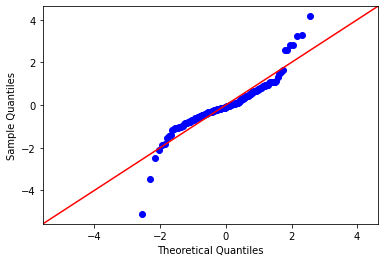

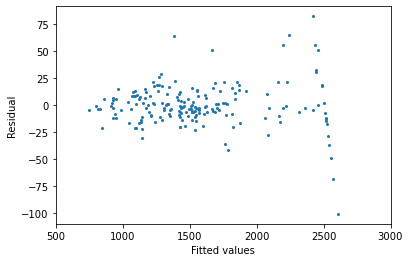

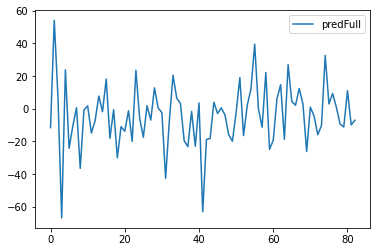

376.5493082904448


In [48]:
#학습데이터의 잔차 확인
 
res = fittedFullModel.resid
import matplotlib.pyplot as plt
#Q-Q plot # 정규분포확인
fig = sm.qqplot(res, fit=True, line='45')
plt.show()

# residual pattern 확인 
predY = fittedFullModel.predict(trainX)
fig = plt.scatter(predY,res,s=4)
plt.xlim(500,3000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()
 
#검증 데이터에 대한 예측
 
predY2 = fittedFullModel.predict(testX)
 
plt.plot(np.array(testY-predY2),label="predFull")
plt.legend()
plt.show()
 
#MSE 값 구하기
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true=testY,y_pred=predY2)
print(MSE)

#### 1. QQ-plot을 봤을 때, 완벽하게 종규성을 보이지는 않지만 꼬리부분을 제외하고는 정규성을 띄고있다고 판단된다.
#### 2. 학습된 모델의 예측값과 잔차간의 상관관계를 보면 높은 값 부분을 제외하면 잔차가 비교적 균등하게 나왔다.
#### 3. 이상값이 여러군데 나와 예측오차가 균등하지 못함을 알 수 있다.

In [49]:
#변수 선택법(전체 경우의 수를 찾는 방법)
#변수선택을 통해 형성한 모델의 AIC를 찾는다.(AIC가 낮을수록 모델이 좋다고 평가된다)
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}

print(processSubset(x=trainX,y=trainY,feature_set=featureColums)) #전체 변수의 AIC test
print(processSubset(x=trainX,y=trainY,feature_set=featureColums[0:5]))
 
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel
 
print(getBest(x=trainX,y=trainY,k=2))
 
#변수 선택에 따른 학습시간과 저장 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(trainX,trainY,i)
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
models # 선택된 변수의 개수(1,2,3)별 가장낮은 AIC를 보유한 모델들이 들어있는 DF

# 가장 AIC가 낮은 3번째 모델의 OLS결과를 출력
models.loc[3,"model"].summary()

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B2344670>, 'AIC': 1726.599242452658}
{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B23444F0>, 'AIC': 2360.336112639717}
Processed 136 models on 2 predictors in 0.09502148628234863 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                1935.31
Name: 114, dtype: object
Processed 17 models on 1 predictors in 0.012001752853393555 seconds.
Processed 136 models on 2 predictors in 0.08401799201965332 seconds.
Processed 680 models on 3 predictors in 0.4681053161621094 seconds.
Total elapsed time :  0.5731275081634521 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.619e+04
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.33e-226
Time:                        16:16:38   Log-Likelihood:                -914.88
No. Observations:                 192   AIC:                             1838.
Df Residuals:                     188   BIC:                             1851.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
맑음             1.0045      0.008    127.548      0.000       0.989       1.020
비              0.9284      0.082     11.302      0.000       0.766       1.090
흐림             1.1474      0.064     17.959      0.000       1.021       1.273
const         13.0064      7.568      1.719      0.087      -1.923      27.936
==============================================================================
Omnibus:                       80.139   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.808
Skew:                           1.472   Prob(JB):                     2.86e-99
Kurtosis:                       9.932   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# 모든 변수를 모델링한 것과 비교
print("full model Rsquared:","{:.5f}".format(fittedFullModel.rsquared))
print("full model AIC:","{:.5f}".format(fittedFullModel.aic))
print("full model MSE:","{:.5f}".format(fittedFullModel.mse_total))

print("selected model Rsquared:","{:.5f}".format(models.loc[3,"model"].rsquared))
print("selected model AIC:","{:.5f}".format(models.loc[3,"model"].aic))
print("selected model MSE:","{:.5f}".format(models.loc[3,"model"].mse_total))

full model Rsquared: 0.99813
full model AIC: 1726.59924
full model MSE: 210198.41037
selected model Rsquared: 0.99615
selected model AIC: 1837.76871
selected model MSE: 210198.41037


In [51]:
#전진 선택법
 
def forward(x,y,predictors):
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])

# 변수를 계속 추가하며 AIC가 증가하는 경우가 생기면, 이전 모델을 선택하는 학습과정을 진행한다.
forwordBestModel=forward_model(trainX,trainY)
 
forwordBestModel.summary()

Processed  17 models on 1 predictors in 0.013993501663208008
Selected predictors: ['부상자수', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B111A820>
Processed  16 models on 2 predictors in 0.013002157211303711
Selected predictors: ['부상자수', '맑음', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B111AD00>
Processed  15 models on 3 predictors in 0.011002302169799805
Selected predictors: ['부상자수', '맑음', '흐림', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B260CEE0>
Processed  14 models on 4 predictors in 0.01000213623046875
Selected predictors: ['부상자수', '맑음', '흐림', '비', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B111AD30>
Processed  13 models on 5 predictors in 0.010002374649047852
Selected predictors: ['부상자수', '맑음', '흐림', '비', '기타/불명', 'const'] AIC :  <statsmodels.regression.linear_model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9297.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.25e-239
Time:                        16:17:08   Log-Likelihood:                -849.11
No. Observations:                 192   AIC:                             1720.
Df Residuals:                     181   BIC:                             1756.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
부상자수           0.1480      0.018      8.451      0.000       0.113       0.183
맑음             0.7873      0.027     29.084      0.000       0.734       0.841
흐림             0.9383      0.054     17.223      0.000       0.831       1.046
비              0.7294      0.073      9.997      0.000       0.585       0.873
기타/불명          1.0509      0.122      8.624      0.000       0.810       1.291
71세이상          0.2178      0.080      2.715      0.007       0.060       0.376
눈              0.9734      0.296      3.292      0.001       0.390       1.557
51~60세        -0.1247      0.050     -2.514      0.013      -0.223      -0.027
인구밀도           0.0008      0.000      2.335      0.021       0.000       0.001
65~70세         0.2096      0.124      1.686      0.093      -0.036       0.455
const         -8.7285      8.403     -1.039      0.300     -25.309       7.851
==============================================================================
Omnibus:                       34.114   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.634
Skew:                           0.097   Prob(JB):                     7.07e-67
Kurtosis:                       9.168   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#후진소거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(trainX,trainY,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
#전체 변수를 다 넣은 full모델부터 개수가 하나씩 줄며 AIC가 높아지면 그 변수는 제외하는 방식이다.
backwardBestModel = backword_model(trainX,trainY)
backwardBestModel.summary()

Processed 17 models on 16 predictors in 0.017004013061523438
Selected predictors : ['14세 이하', '51~60세', '61-64세', '65~70세', '71세이상', '교통안전지수', '기타/불명', '눈', '맑음', '부상자수', '비', '사망자수', '안개', '인구', '인구밀도', '흐림', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B228EAC0>
Processed 16 models on 15 predictors in 0.022003889083862305
Selected predictors : ['51~60세', '61-64세', '65~70세', '71세이상', '교통안전지수', '기타/불명', '눈', '맑음', '부상자수', '비', '사망자수', '안개', '인구', '인구밀도', '흐림', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B0F9C580>
Processed 15 models on 14 predictors in 0.013002634048461914
Selected predictors : ['51~60세', '61-64세', '65~70세', '71세이상', '교통안전지수', '기타/불명', '눈', '맑음', '부상자수', '비', '사망자수', '인구', '인구밀도', '흐림', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B0F9C2E0>
Processed 14 models on 13 predictors in 0.012002706527709961
Selected predi

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5839.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          2.01e-229
Time:                        16:17:37   Log-Likelihood:                -845.43
No. Observations:                 192   AIC:                             1725.
Df Residuals:                     175   BIC:                             1780.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
14세 이하         0.0570      0.071      0.803      0.423      -0.083       0.197
51~60세        -0.1534      0.054     -2.865      0.005      -0.259      -0.048
61-64세        -0.1178      0.102     -1.158      0.249      -0.319       0.083
65~70세         0.2342      0.133      1.765      0.079      -0.028       0.496
71세이상          0.2311      0.086      2.699      0.008       0.062       0.400
교통안전지수        -1.1481      0.636     -1.806      0.073      -2.403       0.106
기타/불명          1.0414      0.125      8.329      0.000       0.795       1.288
눈              1.0399      0.315      3.298      0.001       0.418       1.662
맑음             0.7783      0.028     27.335      0.000       0.722       0.834
부상자수           0.1603      0.019      8.591      0.000       0.123       0.197
비              0.7056      0.075      9.445      0.000       0.558       0.853
사망자수          -0.3609      0.391     -0.923      0.357      -1.133       0.411
안개            -2.0837      2.395     -0.870      0.385      -6.811       2.643
인구          2.257e-05   2.78e-05      0.812      0.418   -3.23e-05    7.74e-05
인구밀도           0.0008      0.000      2.165      0.032    7.02e-05       0.002
흐림             0.9099      0.060     15.211      0.000       0.792       1.028
const         83.0472     51.299      1.619      0.107     -18.197     184.291
==============================================================================
Omnibus:                       33.464   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.354
Skew:                           0.059   Prob(JB):                     1.99e-64
Kurtosis:                       9.054   Cond. No.                     1.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#단계적선택법
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])

#forward와 backward를 AIC를 기준으로 비교하며 단계적 반복진행하는 학습을 통해 변수를 선택한다.
stepwiseBestModel = Stepwise_model(trainX,trainY)
stepwiseBestModel.summary()

Processed  17 models on 1 predictors in 0.01400303840637207
Selected predictors: ['부상자수', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B0FC6D60>
forward
Processed 1 models on 0 predictors in 0.0010001659393310547
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B2379CA0>
Processed  16 models on 2 predictors in 0.01200246810913086
Selected predictors: ['부상자수', '맑음', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B0FC6B20>
forward
Processed 2 models on 1 predictors in 0.0020003318786621094
Selected predictors : ['부상자수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000205B08CDDF0>
Processed  15 models on 3 predictors in 0.011002779006958008
Selected predictors: ['부상자수', '맑음', '흐림', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9297.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.25e-239
Time:                        16:18:58   Log-Likelihood:                -849.11
No. Observations:                 192   AIC:                             1720.
Df Residuals:                     181   BIC:                             1756.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
부상자수           0.1480      0.018      8.451      0.000       0.113       0.183
맑음             0.7873      0.027     29.084      0.000       0.734       0.841
흐림             0.9383      0.054     17.223      0.000       0.831       1.046
비              0.7294      0.073      9.997      0.000       0.585       0.873
기타/불명          1.0509      0.122      8.624      0.000       0.810       1.291
71세이상          0.2178      0.080      2.715      0.007       0.060       0.376
눈              0.9734      0.296      3.292      0.001       0.390       1.557
51~60세        -0.1247      0.050     -2.514      0.013      -0.223      -0.027
인구밀도           0.0008      0.000      2.335      0.021       0.000       0.001
65~70세         0.2096      0.124      1.686      0.093      -0.036       0.455
const         -8.7285      8.403     -1.039      0.300     -25.309       7.851
==============================================================================
Omnibus:                       34.114   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.634
Skew:                           0.097   Prob(JB):                     7.07e-67
Kurtosis:                       9.168   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# number of params
print(forwordBestModel.params.shape, backwardBestModel.params.shape, stepwiseBestModel.params.shape)

(11,) (17,) (11,)


#### 후진소거법을 제외한 나머지 두개 선택법의 변수의 개수는 같다.

In [58]:
# 모델에 의해 예측된/추정된 값 = testY
pred_y_full = fittedFullModel.predict(testX)
pred_y_forward = forwordBestModel.predict(testX[forwordBestModel.model.exog_names])
pred_y_backward = backwardBestModel.predict(testX[backwardBestModel.model.exog_names])
pred_y_stepwise = stepwiseBestModel.predict(testX[stepwiseBestModel.model.exog_names])

In [59]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인할 예정

perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(testY,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(testY,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(testY,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(testY,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(testY, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(testY, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(testY, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(testY, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(testY, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(testY, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(testY, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(testY, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(testY, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(testY, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(testY, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(testY, pred_y_stepwise)

print(perf_mat)

           ALL  FORWARD BACKWARD STEPWISE
MSE    376.549  380.377  378.101  380.377
RMSE   19.4049  19.5033  19.4448  19.5033
MAE    13.9978  13.8917  14.0927  13.8917
MAPE  0.928273  0.90581  0.93298  0.90581


#### 위의 표를 보면 MSE , RMSE 의 경우 모두 모든 변수를 넣었을때가 오차는 더욱 적었지만 MAE, MAPE 경우FORWARD , STEPWISE에서의 수치가 더 낮아졌음을 확인할 수 있다. 
#### 하지만, 모든 변수를 넣은 모델은 변수가 18개나 되기에, 학습의 효율성 측면에서 변수선택모델들이 Full 변수 모델보다 효율적이다. 그리고 다중공선성 과적합과 같은 문제가 발생할 때, 변수를 줄이는 방법을 통해서 모델의 신뢰성을 높일 수 있다. 
#### 결국, 전진선택법과 단계적선택법을 활용한 모델에서 가장 좋은 성능을 보여준다.